# FP-6 Final Project Report — Machine Learning (Validated)

## Research question
Do national-level factors (income group, population, electricity demand, and greenhouse gas emissions) help explain cross-country variation in **renewable electricity share**?

## Dataset and unit of analysis
- **Energy data:** Our World in Data (OWID) energy dataset, filtered to **year 2021**.
- **Income classification:** World Bank income classification (FY23), merged using **ISO code**.
- **Unit of analysis:** country (one row per country for 2021 after filtering and cleaning).

## Variables
### Dependent variable (DV)
- **Renewable electricity share (%)**: share of electricity generated from renewables.

### Independent variables (IVs)
- **Fossil fuel electricity share (%)**
- **Greenhouse gas emissions**
- **Electricity demand**
- **Population**
- **Income group** (categorical; encoded for modeling)

## Methods

### Models
Two supervised regression models were compared:
1. **Ridge Regression** (linear baseline)
2. **Random Forest Regressor** (nonlinear model)

### Validation (required)
To evaluate generalization performance and reduce overfitting:
- Data were split into **training (80%)** and **test (20%)** sets.
- **5-fold cross-validation** was applied on the training set.
- Final performance was evaluated on the held-out test set using standard regression metrics (e.g., RMSE/MAE/R² in the analysis notebook).

## Main result 1 — Model performance (Predicted vs Actual)

The figure below compares predicted and observed renewable electricity shares on the **test set**.
Points close to the diagonal line indicate accurate prediction, while points far from the line indicate larger errors.

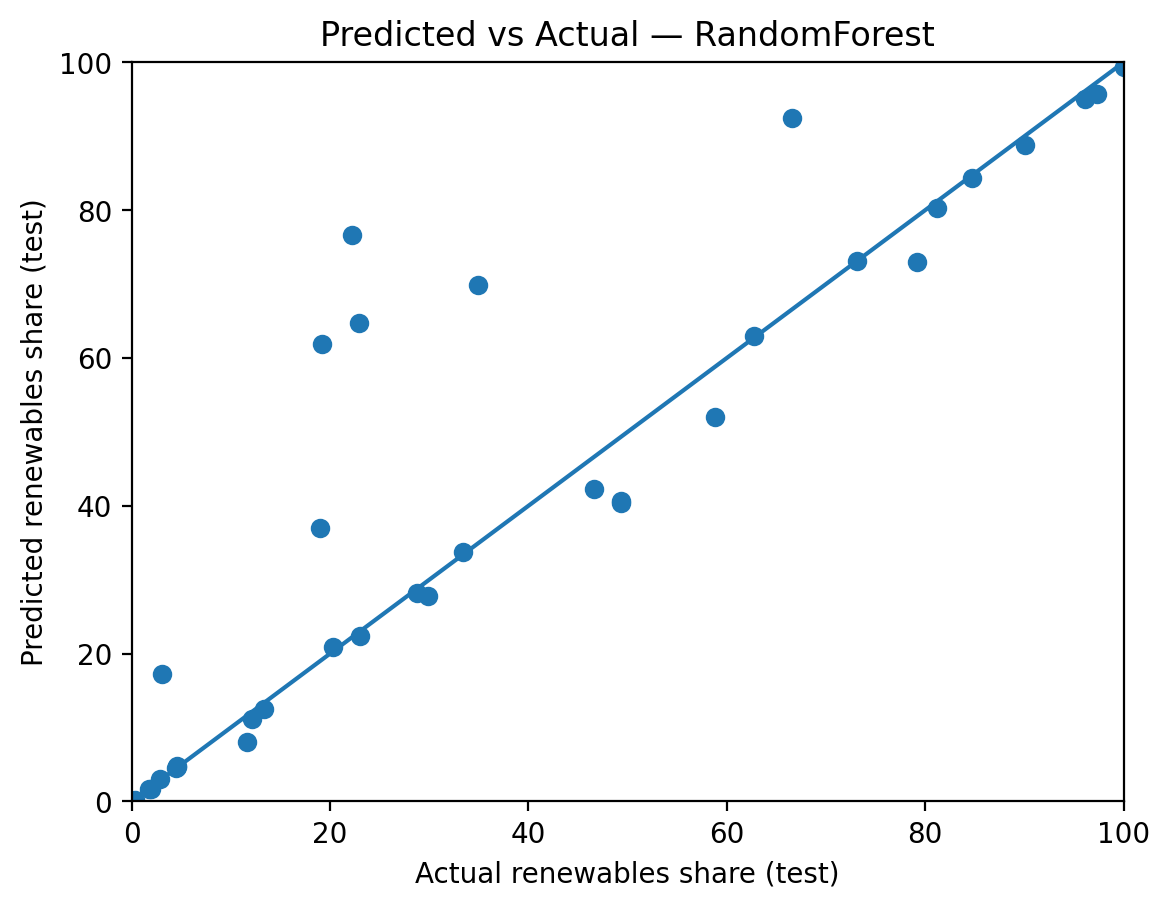

In [1]:
from IPython.display import Image, display
display(Image("fig1_pred_vs_actual.png"))

**Interpretation:**  
The Random Forest model shows strong alignment between predicted and observed renewable electricity shares for many countries, particularly at very low and very high renewable shares.  

Some mid-range cases show larger deviations from the diagonal, indicating that while the selected predictors capture broad cross-country variation, there remains heterogeneity not fully explained by the model (e.g., energy resource endowments, policy choices, and system-level constraints not included in the feature set).

## Main result 2 — Which factors matter most? (Feature importance)

The figure below reports feature importance from the fitted Random Forest model. Feature importance reflects how much each predictor contributes to reducing prediction error within the model.

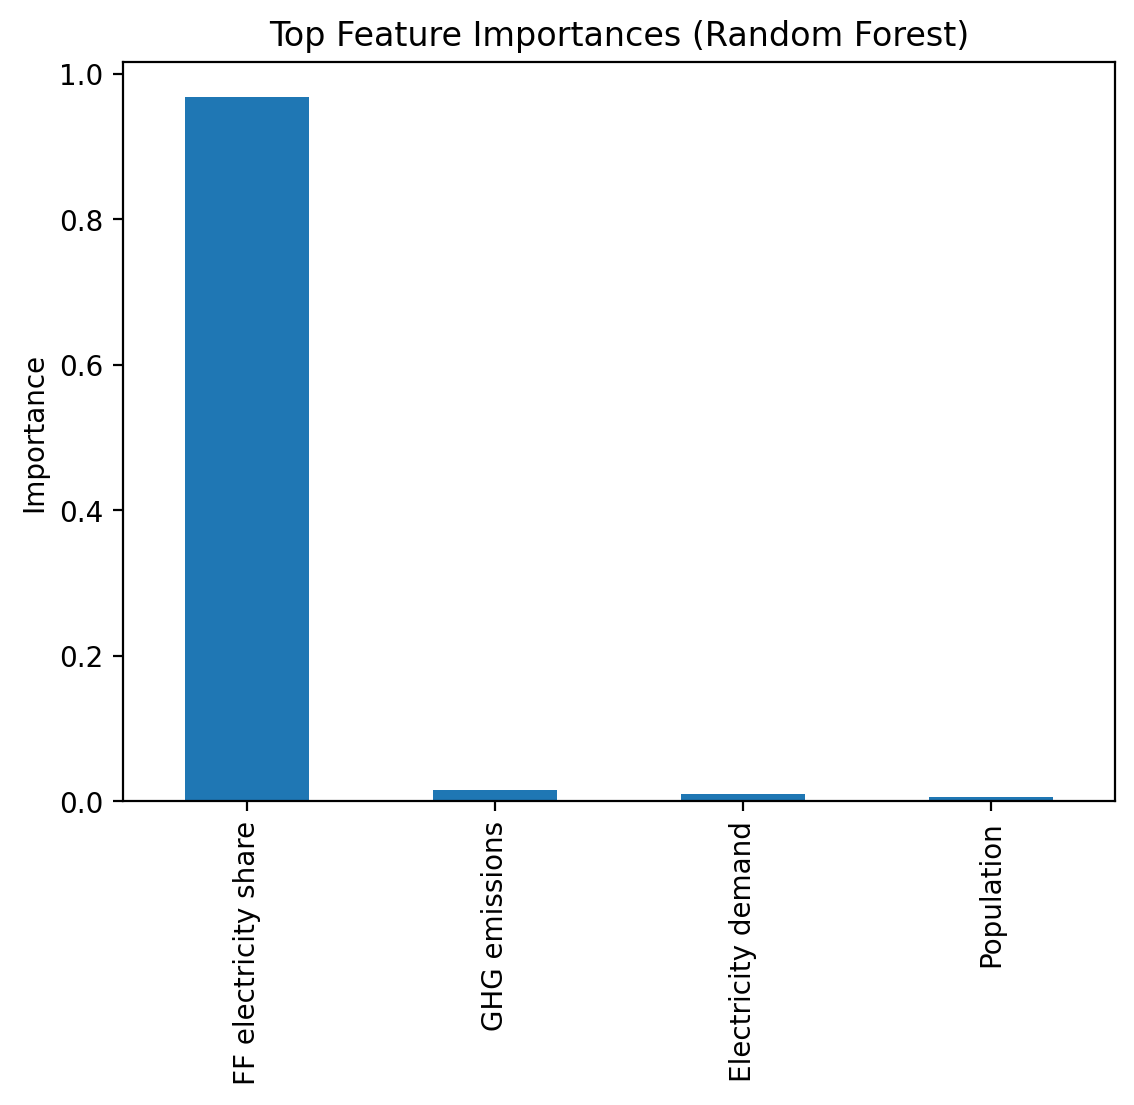

In [2]:
from IPython.display import Image, display
display(Image("fig2_feature_importance.png"))

**Interpretation:**  
Feature importance is dominated by **fossil fuel electricity share**, with substantially smaller contributions from greenhouse gas emissions, electricity demand, and population.

This pattern is expected because electricity generation shares are **compositional**: renewable share and fossil share are mechanically related and together account for most electricity generation in many cases (i.e., they tend to sum to approximately 100% once other sources are small).  

Therefore, the model’s strong reliance on fossil share reflects this structural relationship rather than an independent “driver” in a causal sense.

The smaller importances of other predictors suggest that, conditional on the electricity mix itself, demographic and demand/emissions variables add limited additional predictive power in this specification.

## Conclusion

Using validated machine learning (train/test split + 5-fold cross-validation), a Random Forest regressor provided the best predictive performance for renewable electricity share across countries in 2021. The results indicate that the electricity mix variable **fossil fuel electricity share** is the most informative predictor of renewable share, consistent with the compositional structure of generation shares. Other national-level variables (electricity demand, greenhouse gas emissions, and population) contribute comparatively less in this model.